In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams.update({'font.size': 18}) # Set global font size to 12, adjust as needed

In [2]:
!pip install openpyxl

## Consumption vs Generation

In [23]:
avgWind = np.arange(3,13) # average yearly wind speeds
units = [1,2,3,4,5,6] # number of wind turbines
size = 100 # generation of a singe turbine [kW]

# Annual energy yield for Aeolos-H 100kW turbine for each number of units [MWh]
energyYield1 = [38.94,100.01,183.80,272.90,359.87,434.22,498.58,548.31,583.33,605.65]
energyYield2 = [2*i for i in energyYield1]
energyYield3 = [3*i for i in energyYield1]
energyYield4 = [4*i for i in energyYield1]
energyYield5 = [5*i for i in energyYield1]
energyYield6 = [6*i for i in energyYield1]

sys = [size * i for i in units]
print(sys)

[100, 200, 300, 400, 500, 600]


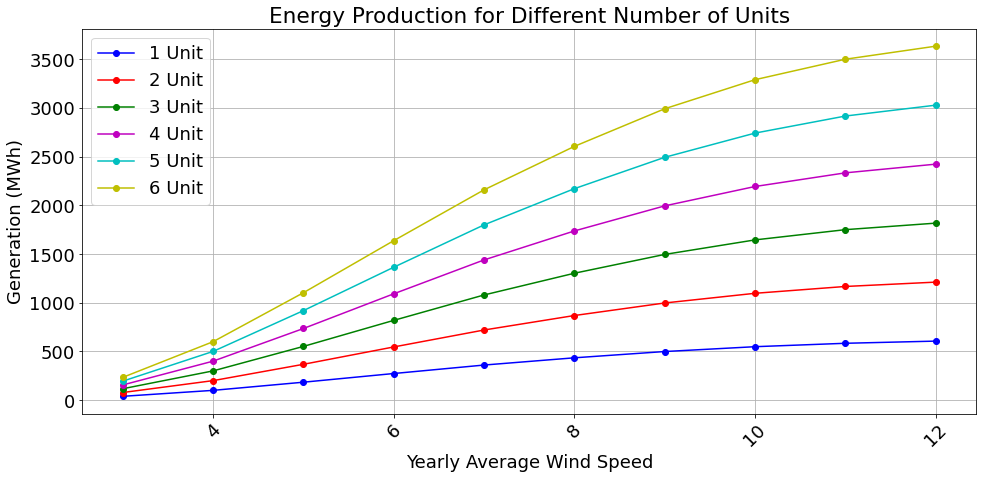

In [17]:
#Plot of the power generated for each number of wind turbine units
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('Energy Production for Different Number of Units')
plt.xlabel('Yearly Average Wind Speed')
plt.ylabel('Generation (MWh)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(avgWind, energyYield1, marker='o', linestyle='-', color='b', label='1 Unit')
ax1.plot(avgWind, energyYield2, marker='o', linestyle='-', color='r', label='2 Unit')
ax1.plot(avgWind, energyYield3, marker='o', linestyle='-', color='g', label='3 Unit')
ax1.plot(avgWind, energyYield4, marker='o', linestyle='-', color='m', label='4 Unit')
ax1.plot(avgWind, energyYield5, marker='o', linestyle='-', color='c', label='5 Unit')
ax1.plot(avgWind, energyYield6, marker='o', linestyle='-', color='y', label='6 Unit')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


## Costs vs Revenue

In [48]:
projLife = 20 # turbine lifespan
# approximate [$/kW] according to https: //www.ontario.ca/page/electricity-generation-using-small-wind-turbines-home-or-farm-use#section-2 
cost = np.arange(8000,12000,1000)
buyback = [0.1,0.13,0.16,0.19,0.22,0.25,0.28,0.31,0.34,0.37,0.4] # range of buyback pricing from 10 c/kWh to 40 c/kWh

# Total cost of system for each number of units [$]
totCost1 = [sys[0] * i for i in cost]
totCost2 = [sys[1] * i for i in cost]
totCost3 = [sys[2] * i for i in cost]
totCost4 = [sys[3] * i for i in cost]
totCost5 = [sys[4] * i for i in cost]
totCost6 = [sys[5] * i for i in cost]


#Yearly revenue for a power yield of 5 m/s yearly wind speed [$]
rev1 = [i * energyYield1[2] * 1000 for i in buyback]
rev2 = [i * energyYield2[2] * 1000 for i in buyback]
rev3 = [i * energyYield3[2] * 1000 for i in buyback]
rev4 = [i * energyYield4[2] * 1000 for i in buyback]
rev5 = [i * energyYield5[2] * 1000 for i in buyback]
rev6 = [i * energyYield6[2] * 1000 for i in buyback]


#Payback period for max and min total costs [yrs]
payback1Min = [totCost[0] / i for i in rev1]
payback1Max = [totCost[3] / i for i in rev1]

payback2Min = [totCost[0] / i for i in rev2]
payback2Max = [totCost[3] / i for i in rev2]

payback3Min = [totCost[0] / i for i in rev3]
payback3Max = [totCost[3] / i for i in rev3]

payback4Min = [totCost[0] / i for i in rev4]
payback4Max = [totCost[3] / i for i in rev4]

payback5Min = [totCost[0] / i for i in rev5]
payback5Max = [totCost[3] / i for i in rev5]

payback6Min = [totCost[0] / i for i in rev6]
payback6Max = [totCost[3] / i for i in rev6]


#Find ROI = net return / cost of investments for max and min total costs
ROI1Min = [i*100*projLife/totCost1[0] for i in rev1]
ROI1Max = [i*100*projLife/totCost1[3] for i in rev1]

ROI2Min = [i*100*projLife/totCost2[0] for i in rev2]
ROI2Max = [i*100*projLife/totCost2[3] for i in rev2]

ROI3Min = [i*100*projLife/totCost3[0] for i in rev3]
ROI3Max = [i*100*projLife/totCost3[3] for i in rev3]

ROI4Min = [i*100*projLife/totCost4[0] for i in rev4]
ROI4Max = [i*100*projLife/totCost4[3] for i in rev4]

ROI5Min = [i*100*projLife/totCost5[0] for i in rev5]
ROI5Max = [i*100*projLife/totCost5[3] for i in rev5]

ROI6Min = [i*100*projLife/totCost6[0] for i in rev6]
ROI6Max = [i*100*projLife/totCost6[3] for i in rev6]


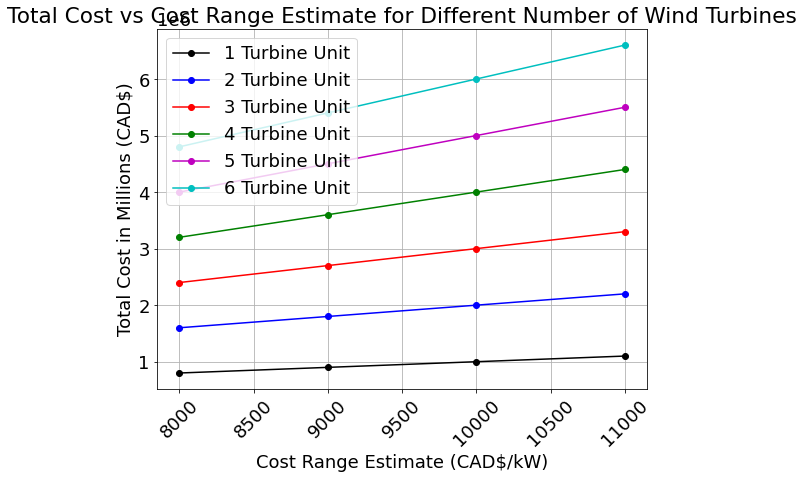

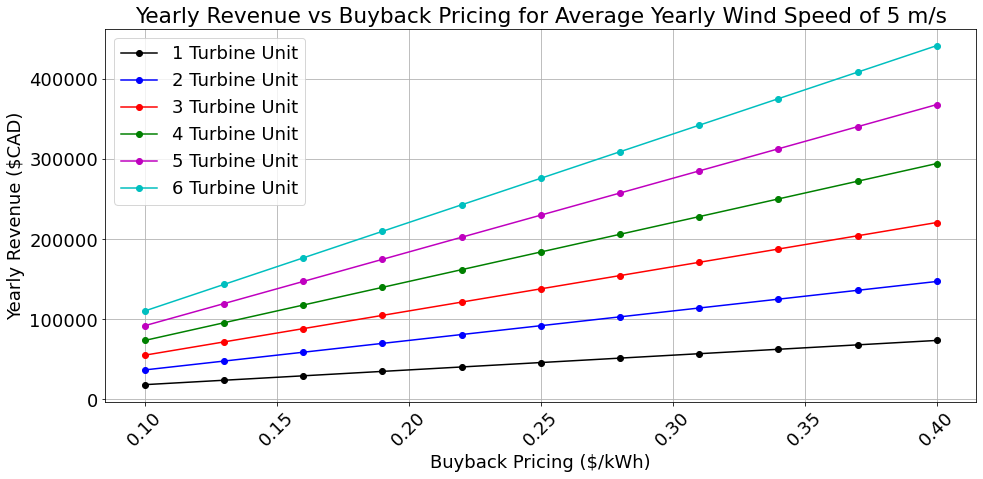

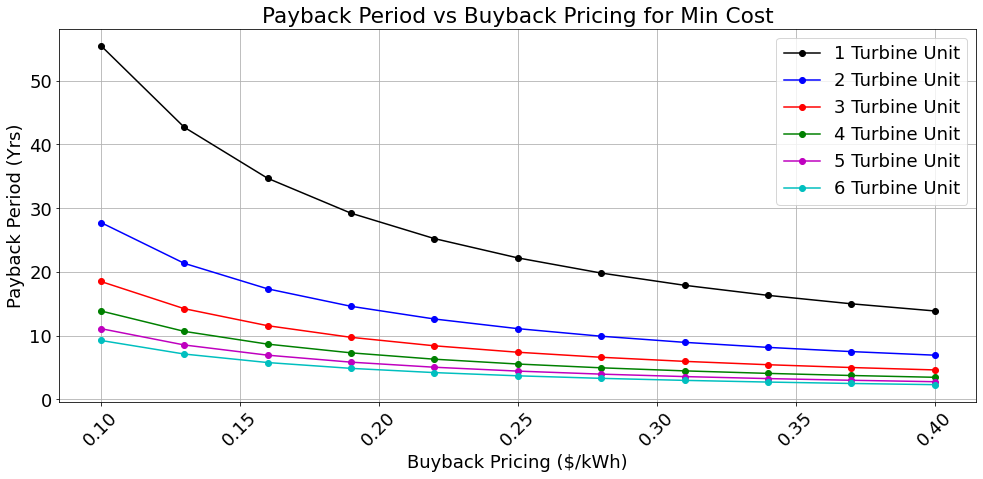

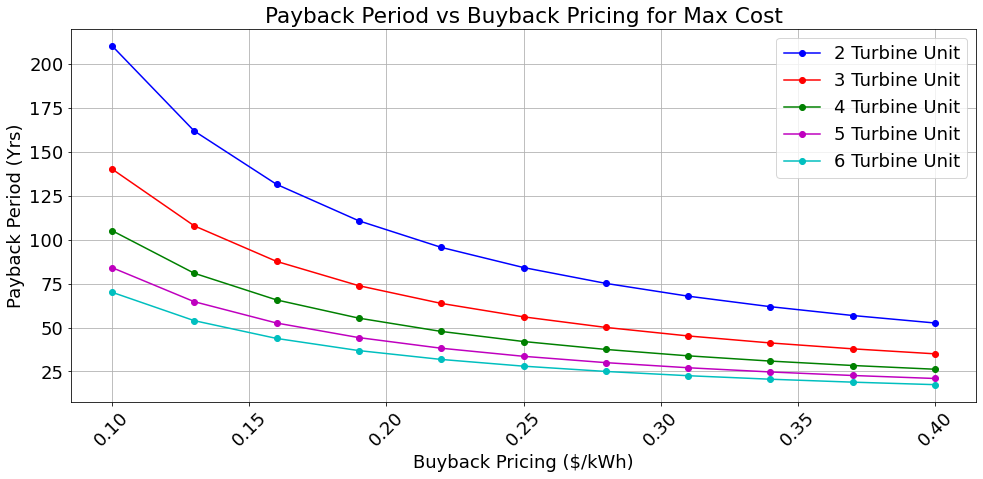

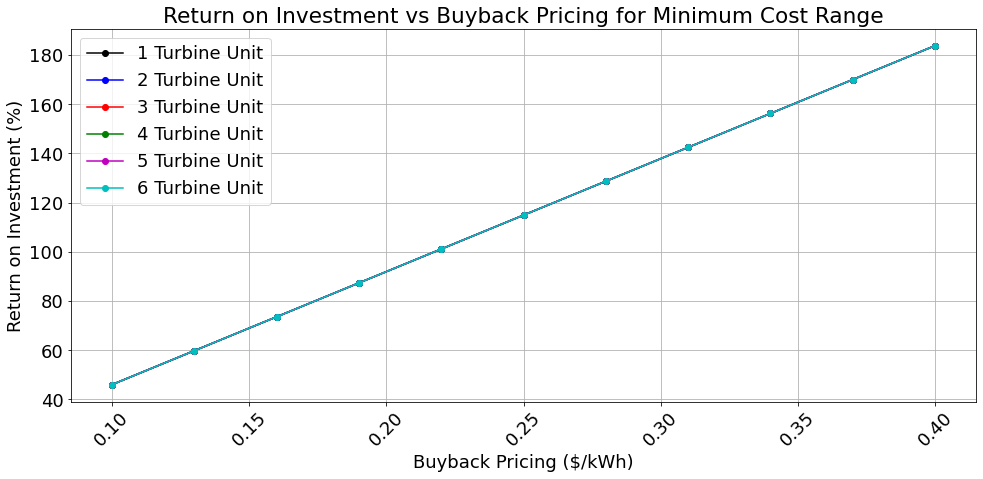

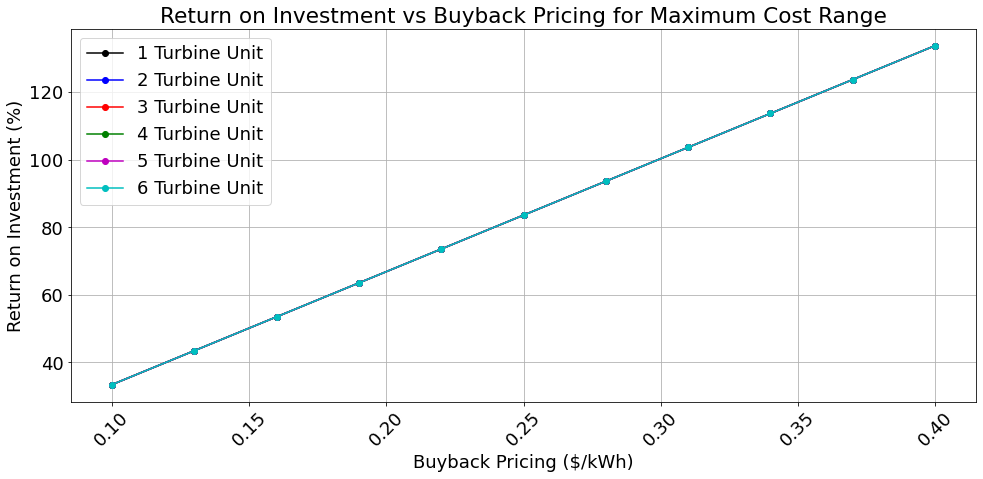

In [47]:
#Plot of the total cost of the solar panels for each configuration
fig, ax1 = plt.subplots(figsize=(8, 7))
plt.title('Total Cost vs Cost Range Estimate for Different Number of Wind Turbines')
plt.xlabel('Cost Range Estimate (CAD$/kW)')
plt.ylabel('Total Cost in Millions (CAD$)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(cost, totCost1, marker='o', linestyle='-', color='k', label='1 Turbine Unit')
ax1.plot(cost, totCost2, marker='o', linestyle='-', color='b', label='2 Turbine Unit')
ax1.plot(cost, totCost3, marker='o', linestyle='-', color='r', label='3 Turbine Unit')
ax1.plot(cost, totCost4, marker='o', linestyle='-', color='g', label='4 Turbine Unit')
ax1.plot(cost, totCost5, marker='o', linestyle='-', color='m', label='5 Turbine Unit')
ax1.plot(cost, totCost6, marker='o', linestyle='-', color='c', label='6 Turbine Unit')

plt.legend()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()




#Plot of the yearly revenue for each configuration with batteries
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('Yearly Revenue vs Buyback Pricing for Average Yearly Wind Speed of 5 m/s')
plt.xlabel('Buyback Pricing ($/kWh)')
plt.ylabel('Yearly Revenue ($CAD)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(buyback, rev1, marker='o', linestyle='-', color='k', label='1 Turbine Unit')
ax1.plot(buyback, rev2, marker='o', linestyle='-', color='b', label='2 Turbine Unit')
ax1.plot(buyback, rev3, marker='o', linestyle='-', color='r', label='3 Turbine Unit')
ax1.plot(buyback, rev4, marker='o', linestyle='-', color='g', label='4 Turbine Unit')
ax1.plot(buyback, rev5, marker='o', linestyle='-', color='m', label='5 Turbine Unit')
ax1.plot(buyback, rev6, marker='o', linestyle='-', color='c', label='6 Turbine Unit')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()




#Plot of the payback period in years for each configuration
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('Payback Period vs Buyback Pricing for Min Cost')
plt.xlabel('Buyback Pricing ($/kWh)')
plt.ylabel('Payback Period (Yrs)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(buyback, payback1Min, marker='o', linestyle='-', color='k', label='1 Turbine Unit')
ax1.plot(buyback, payback2Min, marker='o', linestyle='-', color='b', label='2 Turbine Unit')
ax1.plot(buyback, payback3Min, marker='o', linestyle='-', color='r', label='3 Turbine Unit')
ax1.plot(buyback, payback4Min, marker='o', linestyle='-', color='g', label='4 Turbine Unit')
ax1.plot(buyback, payback5Min, marker='o', linestyle='-', color='m', label='5 Turbine Unit')
ax1.plot(buyback, payback6Min, marker='o', linestyle='-', color='c', label='6 Turbine Unit')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#Plot of the payback period in years for each configuration
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('Payback Period vs Buyback Pricing for Max Cost')
plt.xlabel('Buyback Pricing ($/kWh)')
plt.ylabel('Payback Period (Yrs)')
plt.xticks(rotation=45)
plt.grid(True)

#ax1.plot(buyback, payback1Max, marker='o', linestyle='-', color='k', label='1 Turbine Unit')
ax1.plot(buyback, payback2Max, marker='o', linestyle='-', color='b', label='2 Turbine Unit')
ax1.plot(buyback, payback3Max, marker='o', linestyle='-', color='r', label='3 Turbine Unit')
ax1.plot(buyback, payback4Max, marker='o', linestyle='-', color='g', label='4 Turbine Unit')
ax1.plot(buyback, payback5Max, marker='o', linestyle='-', color='m', label='5 Turbine Unit')
ax1.plot(buyback, payback6Max, marker='o', linestyle='-', color='c', label='6 Turbine Unit')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()




#Plot of the payback period in years for each configuration
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('Return on Investment vs Buyback Pricing for Minimum Cost Range')
plt.xlabel('Buyback Pricing ($/kWh)')
plt.ylabel('Return on Investment (%)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(buyback, ROI1Min, marker='o', linestyle='-', color='k', label='1 Turbine Unit')
ax1.plot(buyback, ROI2Min, marker='o', linestyle='-', color='b', label='2 Turbine Unit')
ax1.plot(buyback, ROI3Min, marker='o', linestyle='-', color='r', label='3 Turbine Unit')
ax1.plot(buyback, ROI4Min, marker='o', linestyle='-', color='g', label='4 Turbine Unit')
ax1.plot(buyback, ROI5Min, marker='o', linestyle='-', color='m', label='5 Turbine Unit')
ax1.plot(buyback, ROI6Min, marker='o', linestyle='-', color='c', label='6 Turbine Unit')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#Plot of the payback period in years for each configuration
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('Return on Investment vs Buyback Pricing for Maximum Cost Range')
plt.xlabel('Buyback Pricing ($/kWh)')
plt.ylabel('Return on Investment (%)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(buyback, ROI1Max, marker='o', linestyle='-', color='k', label='1 Turbine Unit')
ax1.plot(buyback, ROI2Max, marker='o', linestyle='-', color='b', label='2 Turbine Unit')
ax1.plot(buyback, ROI3Max, marker='o', linestyle='-', color='r', label='3 Turbine Unit')
ax1.plot(buyback, ROI4Max, marker='o', linestyle='-', color='g', label='4 Turbine Unit')
ax1.plot(buyback, ROI5Max, marker='o', linestyle='-', color='m', label='5 Turbine Unit')
ax1.plot(buyback, ROI6Max, marker='o', linestyle='-', color='c', label='6 Turbine Unit')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()